# **NASA: Asteroids Classification**

## Introduction
### Dataset

The data used for this project was obtained from the NASA: Asteroids Classification page on Kaggle (https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification/data). It consists of 4688 instances, each with 40 columns. These columns include information such as the NEO reference ID, name, absolute magnitude, estimated diameter in kilometers (min/max), estimated diameter in meters (min/max), estimated diameter in miles (min/max), estimated diameter in feet (min/max), close approach date, epoch date of close approach, relative velocity in kilometers per second and hour, miles per hour, the miss distance in astronomical units, lunar distance, kilometers, and miles, the orbiting body, orbit ID, orbit determination date, orbit uncertainty, minimum orbit intersection, Jupiter Tisserand invariant, epoch osculation, eccentricity, semi-major axis, inclination, ascending node longitude, orbital period, perihelion distance, perihelion arg, aphelion distance, perihelion time, mean anomaly, mean motion, equinox, and hazardous.

### Problem and Objective

The goal of this project is to identify hazardous and non-hazardous asteroids based on the 40 attributes referred above. 

### Solution

To solve this problem, we will use a learning model that will be trained using the aforementioned database. The model will be divided into two sets, namely the training set and the test set. Using accuracy metrics, we will determine the percentage of correct predictions made by the model. 



### Installing Libraries

We will start by instaling the necessary libraries for this project.
To install the libraries, use the following commands:

```shell
sh ./requirements.sh
```
This shell script will install the necessary libraries for this project. To use it, you must have the `pip` package manager installed on your machine.

Also, if you are using Windows, and you don't have `bash` installed, you should install it before running the script (we suggest using Git Bash, or WSL).

### Importing Libraries

Now, let's import the libraries that we will use in this project:


In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, f1_score, recall_score)
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier


warnings.filterwarnings("ignore")

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        "precision": precision_score(y_true, y_pred, average='weighted'),
        "accuracy": accuracy_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred, average='weighted'),
        "recall": recall_score(y_true, y_pred, average='weighted')
    }

# Train and evaluate model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    
    start_test = time.time()
    y_pred = model.predict(X_test)
    end_test = time.time()
    
    metrics = calculate_metrics(y_test, y_pred)
    return {
        "train_time": end_train - start_train,
        "test_time": end_test - start_test,
        **metrics
    }


## Data Pre-processing

### Creating a dataframe with the original dataset

In [2]:
DATA_FILE = '../data/nasa_db.csv'

data = pd.read_csv(DATA_FILE)

data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Pre-analysis
Before starting the analysis and do any data manipulation, its importante take a look at the dataset to understand the data, such as missing or null values and filter out any outliers.

In [3]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [4]:
data.isna().any()

Neo Reference ID                False
Name                            False
Absolute Magnitude              False
Est Dia in KM(min)              False
Est Dia in KM(max)              False
Est Dia in M(min)               False
Est Dia in M(max)               False
Est Dia in Miles(min)           False
Est Dia in Miles(max)           False
Est Dia in Feet(min)            False
Est Dia in Feet(max)            False
Close Approach Date             False
Epoch Date Close Approach       False
Relative Velocity km per sec    False
Relative Velocity km per hr     False
Miles per hour                  False
Miss Dist.(Astronomical)        False
Miss Dist.(lunar)               False
Miss Dist.(kilometers)          False
Miss Dist.(miles)               False
Orbiting Body                   False
Orbit ID                        False
Orbit Determination Date        False
Orbit Uncertainity              False
Minimum Orbit Intersection      False
Jupiter Tisserand Invariant     False
Epoch Oscula

### Cleaning and preparing dataset
The dataset has no missing values, however, there are some columns that are not relevant for the analysis, as they show the same information under different measures that can be converted to each other, sucha as `Est Dia`, `Relative Velocity`, `Miss Dist.`. Therefore, we will remove these columns.
We decide keep the Km measure and remove the others.
x

From the analysis above, we see that there are also unecessary columns that irrelevant for the analysis. For example, `Orbit Body` and `Equinox` have the same value for all the instances, as we can see bellow. Therefore, we will remove these columns from the dataset.

In [5]:
count_values = data.groupby('Orbiting Body').size().reset_index(name='count')
print(count_values)
count_values = data.groupby('Equinox').size().reset_index(name='count')
print(count_values)

data = data.drop(['Orbiting Body'], axis=1)
data = data.drop(['Equinox'], axis=1)
data = data.drop(['Name'], axis=1)
data = data.drop(['Est Dia in M(min)'], axis=1)
data = data.drop(['Est Dia in M(max)'], axis=1)
data = data.drop(['Est Dia in Miles(min)'], axis=1)
data = data.drop(['Est Dia in Miles(max)'], axis=1)
data = data.drop(['Est Dia in Feet(min)'], axis=1)
data = data.drop(['Est Dia in Feet(max)'], axis=1)
data = data.drop(['Relative Velocity km per sec'], axis=1)
data = data.drop(['Miles per hour'], axis=1)
data = data.drop(['Miss Dist.(Astronomical)'], axis=1)
data = data.drop(['Miss Dist.(lunar)'], axis=1)
data = data.drop(['Miss Dist.(miles)'], axis=1)
data = data.drop(['Close Approach Date'],axis=1)
data = data.drop(['Orbit Determination Date'],axis=1)

data.head()

  Orbiting Body  count
0         Earth   4687
  Equinox  count
0   J2000   4687


,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.6,0.127220,0.284472,788947200000,22017.003799,62753692.0,17,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,21.3,0.146068,0.326618,788947200000,65210.346095,57298148.0,21,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,20.3,0.231502,0.517654,789552000000,27326.560182,7622911.5,22,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,27.4,0.008801,0.019681,790156800000,40225.948191,42683616.0,7,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,21.6,0.127220,0.284472,790156800000,35426.991794,61010824.0,25,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


The target variable is a categorical variable, so we will encode it to numerical values in order to use it in the model. 
The other variables are already numerical, so we don't need to encode them.

In [6]:
encoder = LabelEncoder()

data['Hazardous'] = encoder.fit_transform(data['Hazardous'])

data.head()


,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,21.6,0.127220,0.284472,788947200000,22017.003799,62753692.0,17,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,3723955,21.3,0.146068,0.326618,788947200000,65210.346095,57298148.0,21,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,2446862,20.3,0.231502,0.517654,789552000000,27326.560182,7622911.5,22,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,3092506,27.4,0.008801,0.019681,790156800000,40225.948191,42683616.0,7,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,3514799,21.6,0.127220,0.284472,790156800000,35426.991794,61010824.0,25,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


### Analysis
Since the dataset is already clean, we will proceed to the analysis of the data, to get some insights and understand it better.

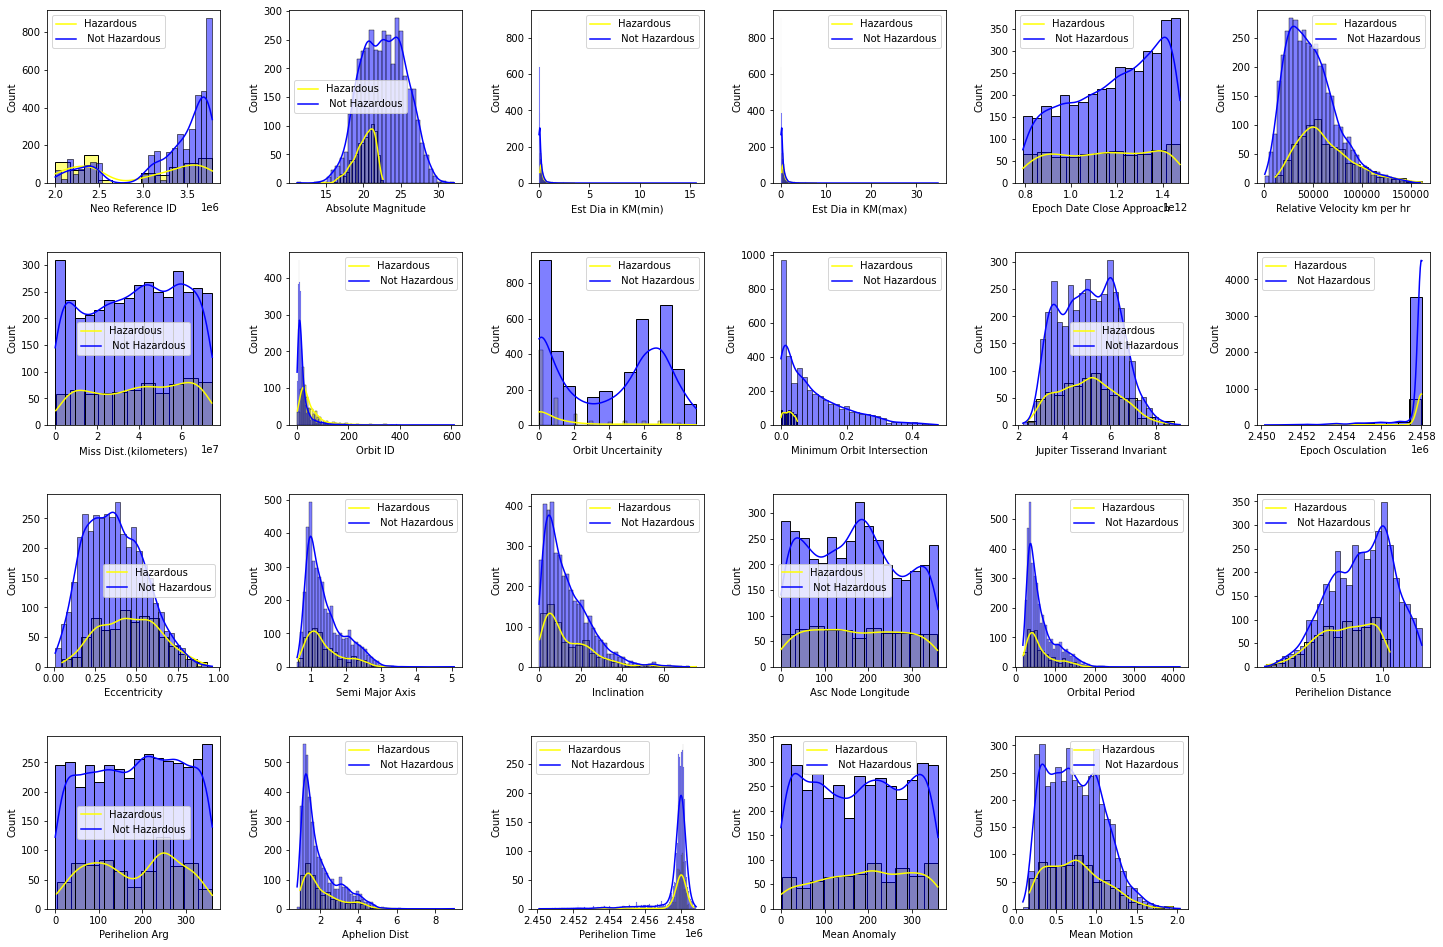

In [7]:
plt.figure(figsize=(24,24))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

data1 = data[data['Hazardous']==1].drop(['Hazardous'],axis=1)
data2 = data[data['Hazardous']==0].drop(['Hazardous'],axis=1)

cols = list(data1.columns)

for i, col in enumerate(cols):
   
    plt.subplot(6,6,i+1)
    sb.histplot(data=data1[col], color='yellow', label = 'Hazardous', kde=True)
    sb.histplot(data=data2[col], color='blue', label = ' Not Hazardous', kde=True)
    _,axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes,prop={'size': 10})

plt.show()

After that, we can see the plot of the correlation matrix, which shows the correlation between the variables.

<AxesSubplot:>

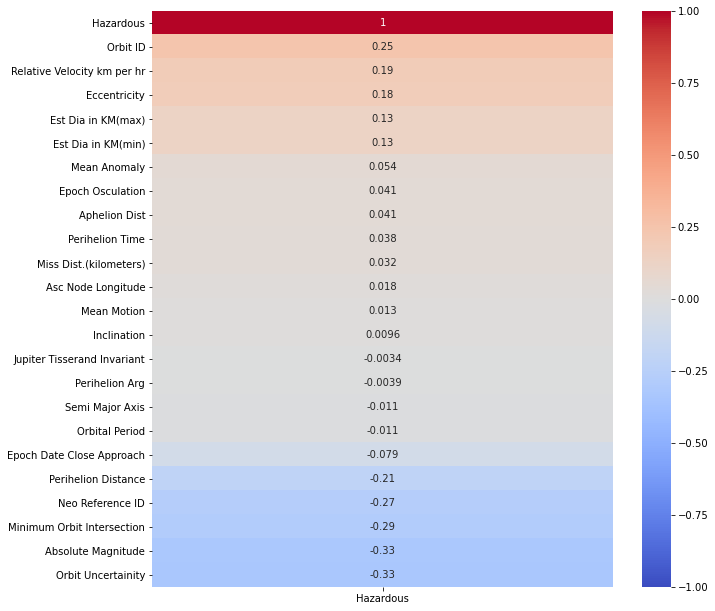

In [8]:
cols = list(data1.columns)

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

corr = data.corr()[['Hazardous']].sort_values(by='Hazardous', ascending=False)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

As we can see from the correlation matrix, the variables are not highly correlated with each other. That means it will be hard to predict using only a few variables if an asteroid is hazardous or not. Still, we decided to proceed with a Swarmplot to confirm that.

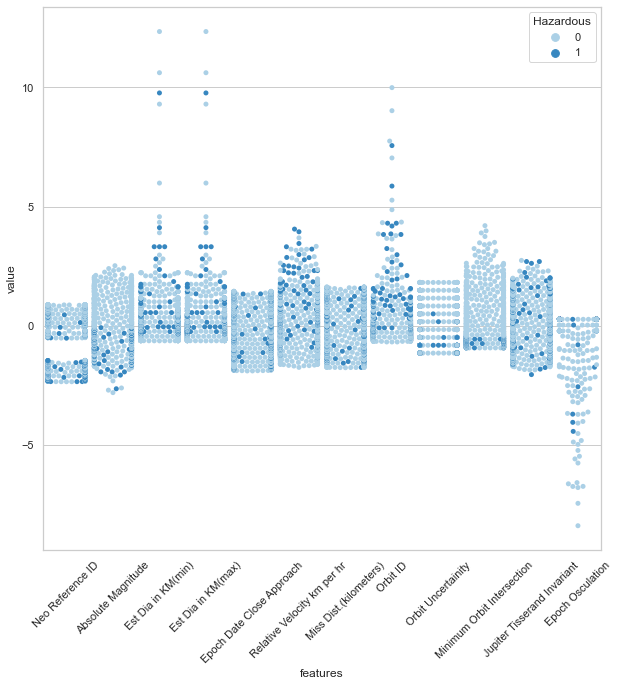

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
3804,2490581,20.4,0.221083,0.494356,1389772800000,27511.494115,20335124.0,56,1,0.031146,...,9.834618,263.277974,288.948855,0.690580,10.534391,1.020137,2.457943e+06,71.979993,1.245895,1
4680,3608620,23.6,0.050647,0.113250,1473318000000,49274.492882,49683940.0,8,7,0.086149,...,24.775334,175.870458,369.779900,0.883224,320.137043,1.133252,2.458175e+06,189.698962,0.973552,0
805,3028805,20.8,0.183889,0.411188,949996800000,31567.851992,6903757.5,33,0,0.044154,...,11.550807,132.861704,555.697196,0.962833,50.205066,1.682761,2.457731e+06,174.511462,0.647835,1
3996,3690058,25.3,0.023150,0.051765,1410764400000,23112.637369,14563527.0,6,8,0.095969,...,4.593513,0.202437,1449.839167,1.100599,355.439742,3.913323,2.456918e+06,1.065513,0.248303,0
3523,3623679,23.4,0.055533,0.124177,1356163200000,33930.248846,21011558.0,8,6,0.140935,...,13.746344,294.603964,698.555256,0.999165,110.878970,2.082354,2.458338e+06,186.073353,0.515349,0


In [9]:
sb.set(style='whitegrid')
sample_size = 1000
data_sample = data
if len(data) > sample_size:
    data_sample = data.sample(n=sample_size, random_state=42)
data_std = (data_sample - data_sample.mean()) / data_sample.std()
data_temp = pd.concat([data['Hazardous'], data_std.iloc[:,0:12]], axis=1)
data_temp = pd.melt(data_temp, id_vars='Hazardous', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sb.swarmplot(x='features', y='value', hue='Hazardous', data=data_temp, palette='Blues')
plt.xticks(rotation=45)
plt.show()
data_sample.head()

As we can see from the Swarmplot, the variables are not well separated. The only variable that seems to have some sort of separation is the `Minimum Orbit Intersection` (since the hazardous results are concentrated in values<0), but still it is not good enough to predict the target variable, since it still overlaps with a lot of non-hazardous asteroids.

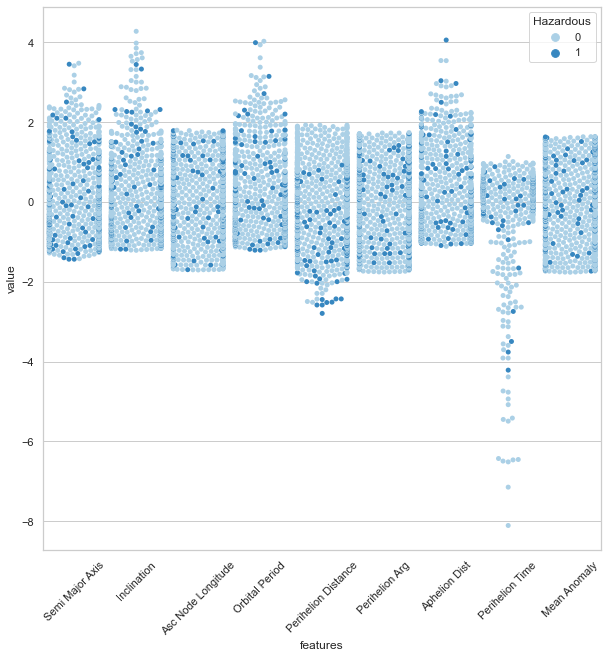

,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
3804,2490581,20.4,0.221083,0.494356,1389772800000,27511.494115,20335124.0,56,1,0.031146,...,9.834618,263.277974,288.948855,0.690580,10.534391,1.020137,2.457943e+06,71.979993,1.245895,1
4680,3608620,23.6,0.050647,0.113250,1473318000000,49274.492882,49683940.0,8,7,0.086149,...,24.775334,175.870458,369.779900,0.883224,320.137043,1.133252,2.458175e+06,189.698962,0.973552,0
805,3028805,20.8,0.183889,0.411188,949996800000,31567.851992,6903757.5,33,0,0.044154,...,11.550807,132.861704,555.697196,0.962833,50.205066,1.682761,2.457731e+06,174.511462,0.647835,1
3996,3690058,25.3,0.023150,0.051765,1410764400000,23112.637369,14563527.0,6,8,0.095969,...,4.593513,0.202437,1449.839167,1.100599,355.439742,3.913323,2.456918e+06,1.065513,0.248303,0
3523,3623679,23.4,0.055533,0.124177,1356163200000,33930.248846,21011558.0,8,6,0.140935,...,13.746344,294.603964,698.555256,0.999165,110.878970,2.082354,2.458338e+06,186.073353,0.515349,0


In [10]:
sb.set(style='whitegrid')
sample_size = 1000
data_sample = data
if len(data) > sample_size:
    data_sample = data.sample(n=sample_size, random_state=42)
data_std = (data_sample - data_sample.mean()) / data_sample.std()
data_temp = pd.concat([data['Hazardous'], data_std.iloc[:,13:22]], axis=1)
data_temp = pd.melt(data_temp, id_vars='Hazardous', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sb.swarmplot(x='features', y='value', hue='Hazardous', data=data_temp, palette='Blues')
plt.xticks(rotation=45)
plt.show()
data_sample.head()

## Feature Selection

In this step, our objective is to find which features highly correlate with each other. We want to remove them from the dataset, as they do not bring any new information to the model, and to avoid multicollinearity. Therefore, we chose a threshold of 0.95 to remove one of the pair of features that have a correlation higher than this value.

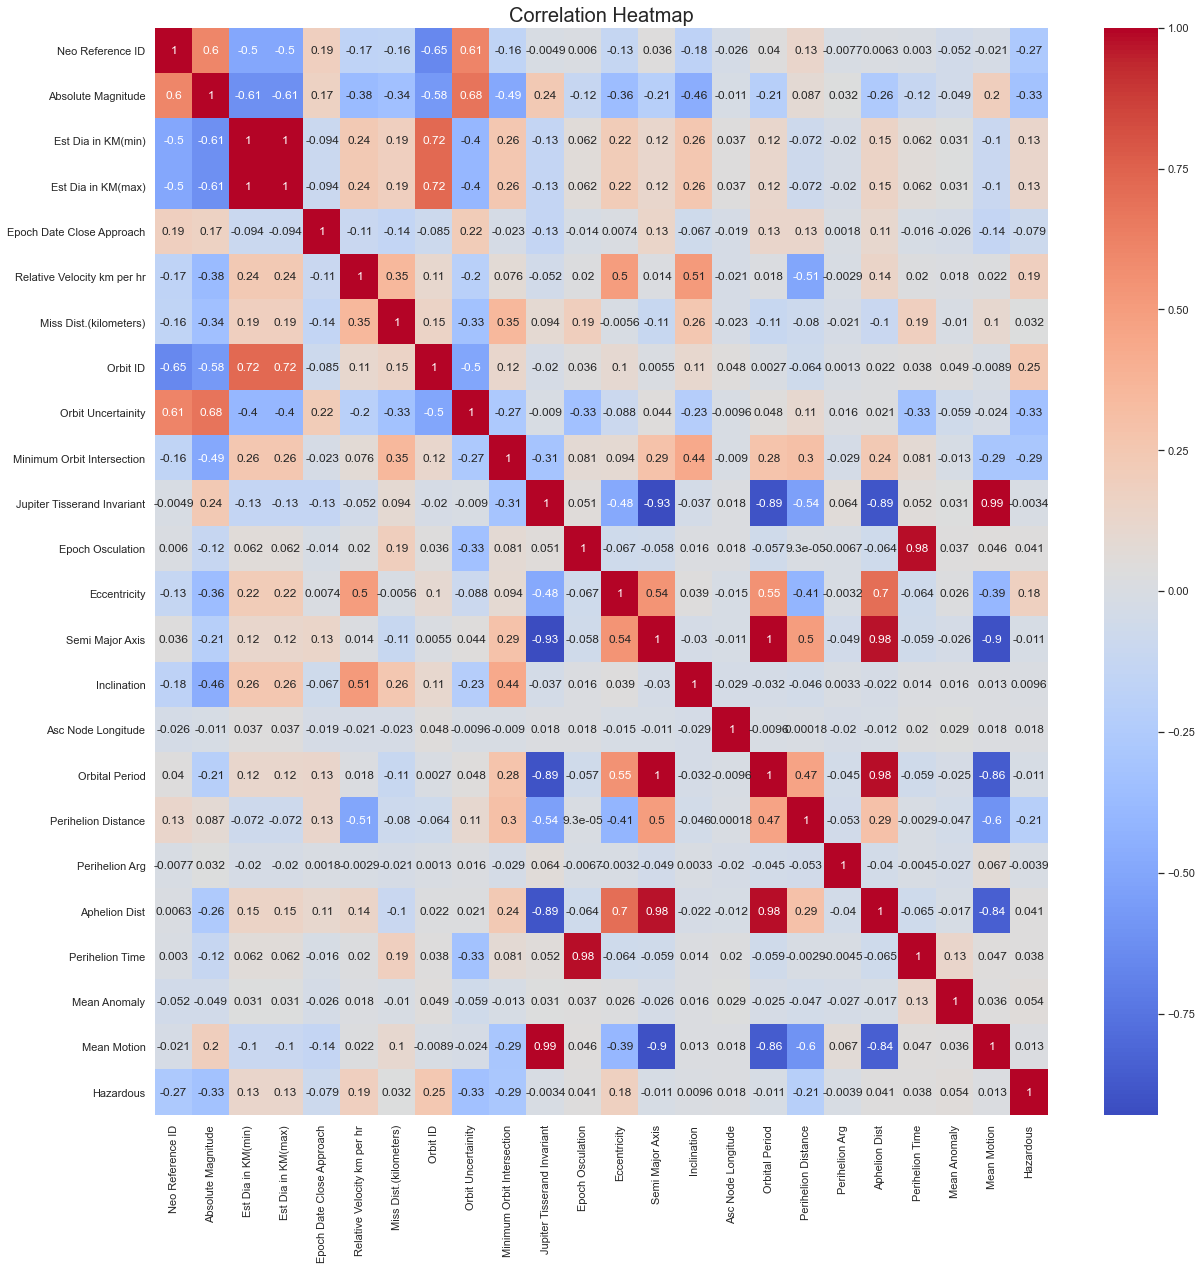

In [11]:
# Select only numeric columns from the dataframe
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

### Correlation Matrix Analysis

#### Est Dia in KM(max) and Est Dia in Km(min)

The high correlation between `Est Dia in KM(max)` and `Est Dia in KM(min)` is expected, as they represent the same feature (estimated diameter in kilometers) but with different values. The correlation between them is 1, which means that they are perfectly correlated. 

#### Semi Major Axis and Orbit Period

As we can see, `Semi Major Axis` and `Orbit Period` are perfectly correlated, since the correlation between them is 1. This can be explained by Kepler's third law that states that the square of a planet's orbital period is proportional to the cube of the semi-major axis of its orbit.

#### Mean Motion and Jupiter Tisserand Invariant

The high correlation between `Mean Motion` and `Jupiter Tisserand Invariant` arises due to the mathematical and physical relationships between these orbital parameters:

- Both parameters depend on the semi-major axis ($a$).
- Kepler's third law links orbital period (and hence mean motion) with the semi-major axis, ensuring similar $a$ values lead to similar mean motions.

#### Perihelion Time and Epoch Osculation

The high correlation between `Perihelion Time` and `Epoch Osculation` happens beacuse of their intrinsic connection to the timing and calculation of an object's orbital path. Both are temporal markers that reflect the object's movement within the same orbital cycle.

#### Semi Major Axis and Aphelion Distance

The high correlation between `Semi Major Axis` and `Aphelion Dist` is due to the fact that the aphelion distance is directly related to the semi-major axis of an object's orbit. The aphelion distance is the distance between the object and the Sun when it is at its farthest point in its orbit, which is directly related to the semi-major axis.

#### Conclusion

The features that have a high correlation between them are:
- `Est Dia in KM(max)` and `Est Dia in Km(min)`
- `Semi Major Axis` and `Orbit Period`
- `Mean Motion` and `Jupiter Tisserand Invariant`
- `Perihelion Time` and `Epoch Osculation`
- `Semi Major Axis` and `Aphelion Dist`

We will remove one of each pair of features from the dataset. For the `Est Dia in KM(max)` and `Est Dia in Km(min)` pair, we decided to make the average of the two columns and create a new column with this information, since the average in this case is phisiacally meaningful.


In [12]:
data['Est Dia in KM(mean)'] = data[['Est Dia in KM(max)', 'Est Dia in KM(min)']].mean(axis=1)

data = data.drop(['Est Dia in KM(max)', 'Est Dia in KM(min)'], axis=1)
data = data.drop(['Orbital Period'], axis=1)
data = data.drop(['Epoch Osculation'], axis=1)
data = data.drop(['Aphelion Dist'], axis=1)
data = data.drop(['Jupiter Tisserand Invariant'], axis=1)

data.head()

,Neo Reference ID,Absolute Magnitude,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Est Dia in KM(mean)
0,3703080,21.6,788947200000,22017.003799,62753692.0,17,5,0.025282,0.425549,1.407011,6.025981,314.373913,0.808259,57.257470,2.458162e+06,264.837533,0.590551,1,0.205846
1,3723955,21.3,788947200000,65210.346095,57298148.0,21,3,0.186935,0.351674,1.107776,28.412996,136.717242,0.718200,313.091975,2.457795e+06,173.741112,0.845330,0,0.236343
2,2446862,20.3,789552000000,27326.560182,7622911.5,22,0,0.043058,0.348248,1.458824,4.237961,259.475979,0.950791,248.415038,2.458120e+06,292.893654,0.559371,1,0.374578
3,3092506,27.4,790156800000,40225.948191,42683616.0,7,6,0.005512,0.216578,1.255903,7.905894,57.173266,0.983902,18.707701,2.457902e+06,68.741007,0.700277,0,0.014241
4,3514799,21.6,790156800000,35426.991794,61010824.0,25,1,0.034798,0.210448,1.225615,16.793382,84.629307,0.967687,158.263596,2.457814e+06,135.142133,0.726395,1,0.205846


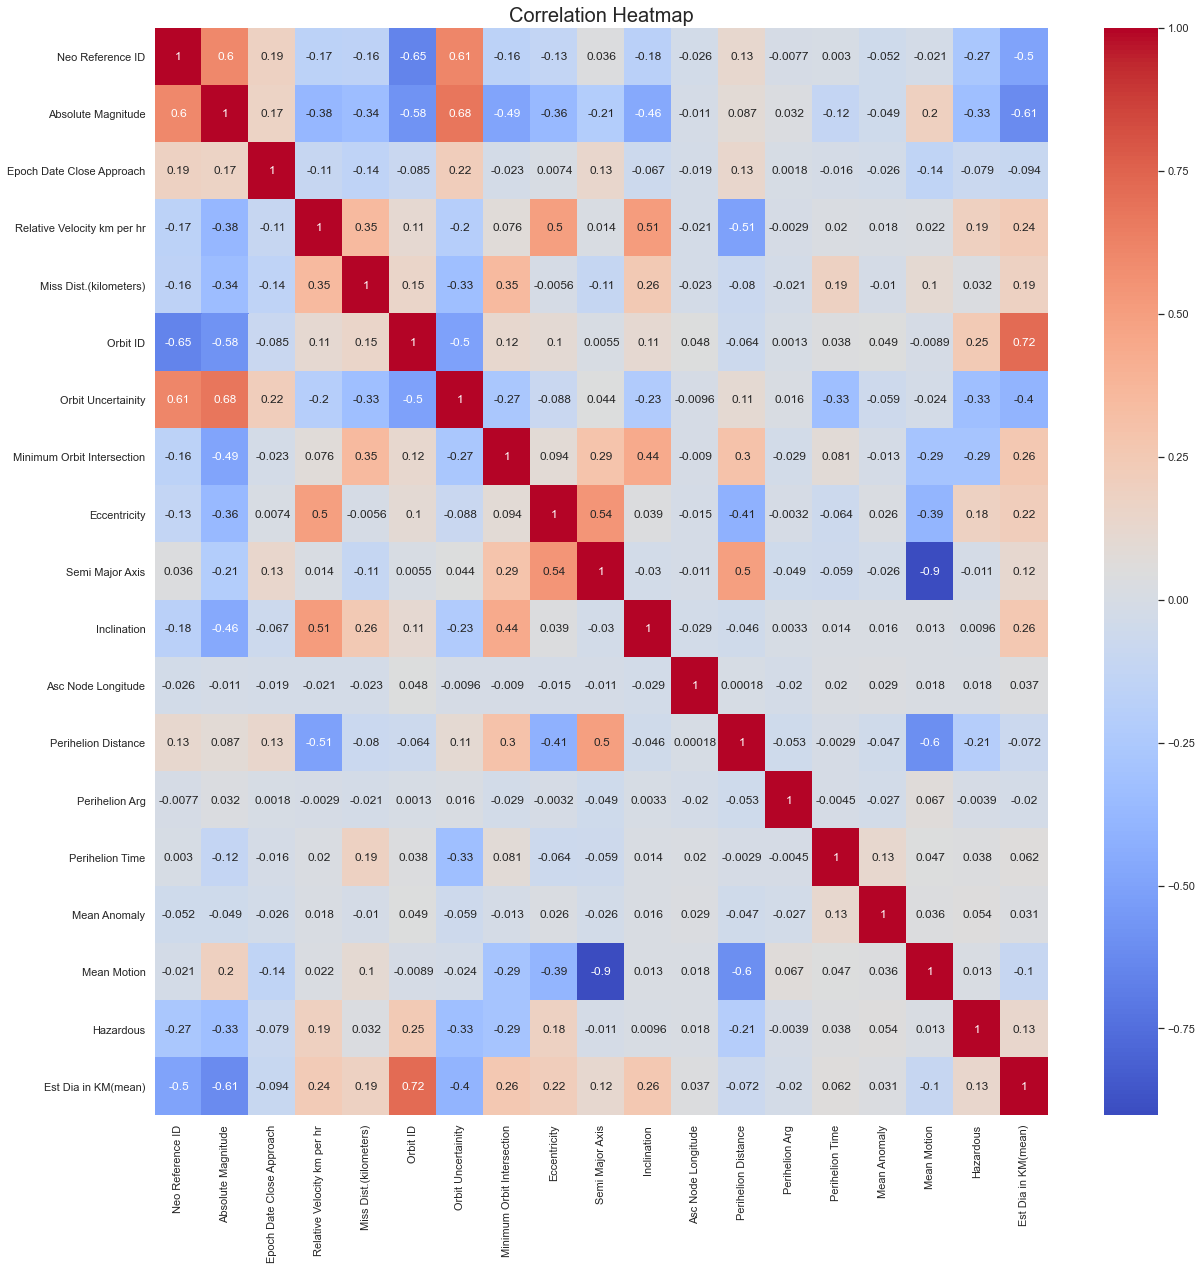

In [13]:
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

As we can see from the Correlation Matrix, the variables are no longer highly correlated with each other, which is good to simplify the model and avoid multicollinearity.

# Model Training

## Prepare the data

As we can see from the analysis above, the dataset is unbalanced, with major of the asteroids being non-hazardous. This can be a problem when training the model, as it can be biased to predict that all asteroids are non-hazardous. So, for this project, we will balance the dataset using the SMOTE technique, and compare the results achieved with and without balancing the dataset.

In [14]:
all_inputs = data.drop(['Hazardous'], axis=1).values
all_labels = data['Hazardous'].values
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

smote = SMOTE(random_state=42)
training_inputs_bal, training_classes_bal = smote.fit_resample(training_inputs, training_classes)

  File "c:\Users\franc\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\franc\anaconda3\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\franc\anaconda3\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\franc\anaconda3\lib\subprocess.py", line 1311, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


For better visualization of the results, we will use a dictionary to store the results of the models and other to keep the models.
The algorithms that we will use are:
- Decision Trees
- Random Forest
- Neural Networks
- K-NN
- SVM
- Gradient Boosting Algorithms (CatBoost)
- Logistic Regression
- Naive Bayes

In [15]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB()
}

results = {
    "unbalanced": {},
    "balanced": {}
}

### Algorithms employment
The results of the models will be store in the `results` dictionary, where the attributes that we will use to compare them are the following:
- time to train the model 
- time to test the model  
- precision Score  
- accuracy Score 
- d1 Score 
- recall Score.

In [16]:
# Training and evaluating the models on the unbalanced dataset
for model_name, model in models.items():
    results["unbalanced"][model_name] = train_and_evaluate(model, training_inputs, testing_inputs, training_classes,
 testing_classes)

# Training and evaluating the models on the balanced dataset
for model_name, model in models.items():
    results["balanced"][model_name] = train_and_evaluate(model, training_inputs_bal, testing_inputs, training_classes_bal, testing_classes)


## Algorithm comparison

In [17]:
print("============================= UNBALANCED DATASET RESUTS =============================")
("\n")
results_unbalanced = pd.DataFrame(results["unbalanced"])
print(results_unbalanced)


============================= UNBALANCED DATASET RESUTS =============================
            Decision Tree  Random Forest  Neural Network      K-NN       SVM  \
train_time       0.054432       2.629367        0.568978  0.001000  0.492784   
test_time        0.002328       0.028819        0.002011  0.739059  0.354396   
precision        0.994018       0.995745        0.683585  0.711505  0.683585   
accuracy         0.994027       0.995734        0.826792  0.798635  0.826792   
f1               0.994021       0.995738        0.748399  0.744518  0.748399   
recall           0.994027       0.995734        0.826792  0.798635  0.826792   

             CatBoost  Logistic Regression  Naive Bayes  
train_time  10.832126             0.035761     0.004053  
test_time    0.014571             0.001000     0.001001  
precision    0.995745             0.683585     0.683585  
accuracy     0.995734             0.826792     0.826792  
f1           0.995738             0.748399     0.748399  
recal

In [18]:
print("============================== BALANCED DATASET RESUTS ==============================")
("\n")
results_balanced = pd.DataFrame(results["balanced"])
print(results_balanced)

============================== BALANCED DATASET RESUTS ==============================
            Decision Tree  Random Forest  Neural Network      K-NN       SVM  \
train_time       0.144624       5.850629        0.778199  0.003837  4.771989   
test_time        0.000504       0.031774        0.002015  0.711534  1.766098   
precision        0.994910       0.995745        0.683585  0.731887  0.728131   
accuracy         0.994881       0.995734        0.826792  0.670648  0.633106   
f1               0.994890       0.995738        0.748399  0.696458  0.670045   
recall           0.994881       0.995734        0.826792  0.670648  0.633106   

             CatBoost  Logistic Regression  Naive Bayes  
train_time  11.590041             0.015418     0.008009  
test_time    0.017996             0.000000     0.001018  
precision    0.994084             0.683585     0.739490  
accuracy     0.994027             0.826792     0.572526  
f1           0.994045             0.748399     0.624259  
recal

### Explanation of the results

The results of the models are shown in the table below. The best model is the Random Forest, with an accuracy score of 0.996. The second best model is the Decision Trees, with an accuracy score of 0.995. The third best model is the Gradient Boosting Algorithms (CatBoost), with an accuracy score of 0.994. 

Therefore, we can conclude that tree-based models are the best choices for the given dataset due to their high performance across all metrics. This is expected, since these algorithms perform well on tabular data with many features due to their ability to handle both numerical and categorical data and to capture complex relationships between features. While Neural Networks and other models have their strengths, they do not perform as well on this particular dataset (as shown by their lower accuracy scores).

Now, let's choose the best model - Random Forest - and evaluate it using the test set.

In [19]:
model = RandomForestClassifier()
model.fit(training_inputs_bal, training_classes_bal)
model.score(testing_inputs, testing_classes)

0.9957337883959044

Now let's plot the confusion matrix of the Random Forest model to see how it is performing.

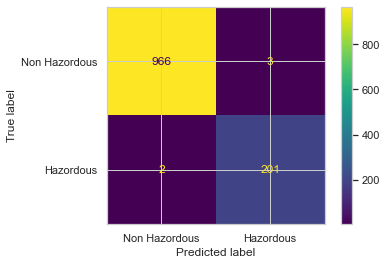

In [20]:
y_pred = model.predict(testing_inputs)
confusion_matrix_results = confusion_matrix(testing_classes, y_pred)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_results, display_labels=["Non Hazordous", "Hazordous"]).plot()
plt.show()